In [67]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\milk.csv', index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [69]:
df.shape

(25, 5)

In [70]:
s_scalar = StandardScaler().set_output(transform='pandas')
df_scl = s_scalar.fit_transform(df)

pca = PCA().set_output(transform='pandas')
pca_df = pca.fit_transform(df_scl)
pca_df #Eigen vector

,pca0,pca1,pca2,pca3,pca4
Animal,,,,,
HORSE,2.435175,-0.231478,0.330150,0.307664,0.048184
ORANGUTAN,2.258736,-0.693148,0.029035,-0.081057,-0.000532
MONKEY,2.335861,-0.663328,0.101257,0.247997,0.010109
DONKEY,2.318677,-0.273815,0.109881,-0.092873,-0.006769
HIPPO,2.060294,-1.019199,-0.762436,-0.510091,0.029382
CAMEL,1.301536,0.137303,-0.198742,-0.282160,-0.014668
BISON,1.282742,0.622667,0.253785,0.065148,-0.044486
BUFFALO,0.505068,0.088235,0.008383,0.133774,0.083806
GUINEA PIG,-0.255502,0.287373,-0.881857,-0.013100,-0.016484


In [71]:
var_cov = np.cov(df_scl.T)
value, vectors = np.linalg.eig(var_cov)


# Varicance and scores are similar
pd.DataFrame([value, pca_df.var()], index=['engen values', 'pca scores']).T

,engen values,pca scores
0,4.040412,4.040412
1,0.924372,0.924372
2,0.006570,0.134291
3,0.134291,0.102689
4,0.102689,0.006570


In [72]:
# Total variation
total_variation = pca_df.var().sum()

In [73]:
pca_df.var()/total_variation * 100

pca0    77.575905
pca1    17.747950
pca2     2.578385
pca3     1.971621
pca4     0.126140
dtype: float64

In [74]:
pca.explained_variance_ratio_*100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

In [75]:
import matplotlib.pyplot as plt
from pca import pca

model = pca()

In [76]:
result = model.fit_transform(df_scl, col_labels=list(df.columns), row_labels=list(df.index))

[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


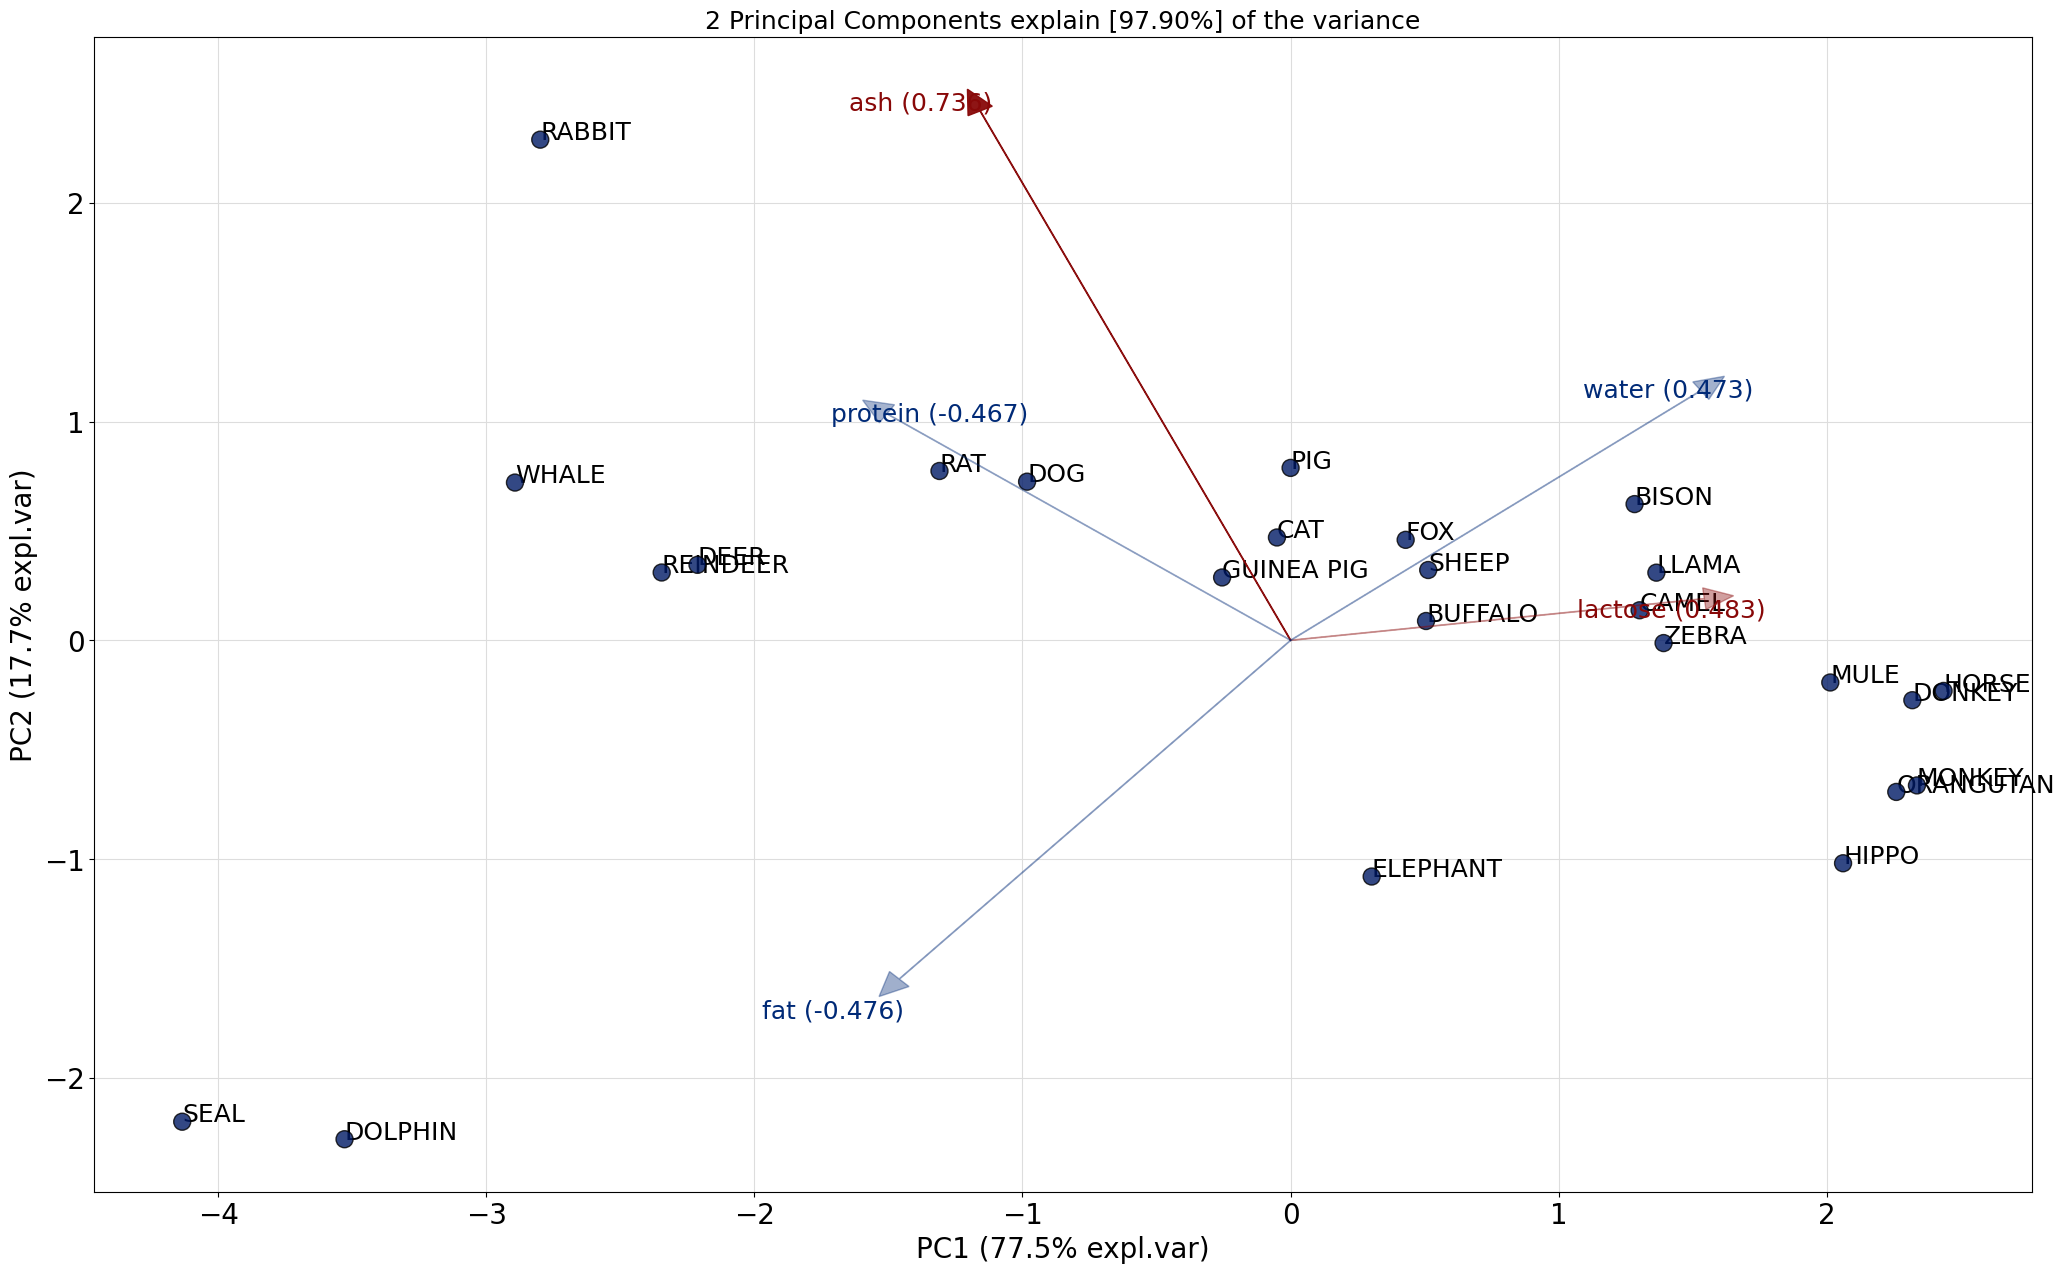

In [77]:
model.biplot(label=True, legend=True)

for i in range(df.shape[0]):
    plt.text(pca_df.values[i, 0], pca_df.values[i, 1], list(df.index)[i])  # Adjusted coordinates to (0, 1)
    
plt.show()